In [17]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
import pandas as pd

In [18]:
X,y=make_regression(n_samples=4,n_features=1,n_informative=1,n_targets=1,noise=80,random_state=13)

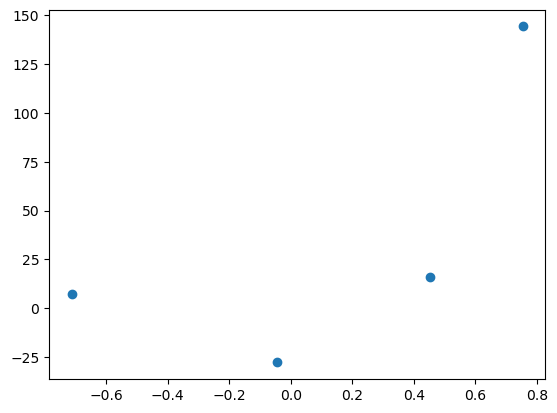

In [19]:
plt.scatter(X,y)

In [20]:
from sklearn.linear_model import LinearRegression


In [21]:
reg= LinearRegression()


In [22]:
reg.fit(X, y)

LinearRegression()

In [23]:
print(reg.coef_)
print(reg.intercept_)


[78.35063668]
26.15963284313262


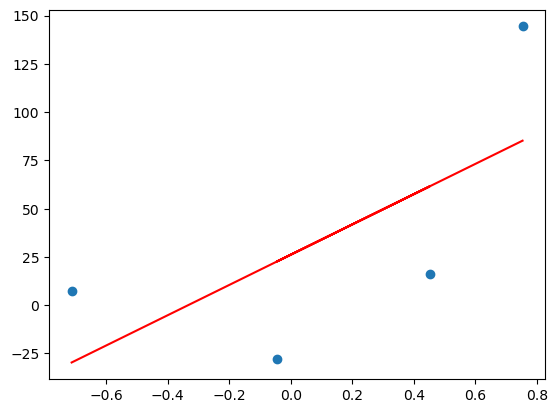

In [24]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red')

In [25]:
y_pred=((78.35*X)+0).reshape(4)

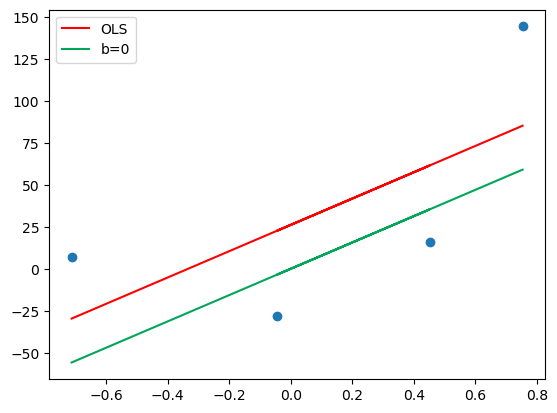

In [26]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred,color='#00a65a',label='b=0')
plt.legend()
plt.show()

In [27]:
m=78.35
b=0
loss_slope=-2*np.sum(y-m*X.ravel()-b)
loss_slope

-209.27763408209216

In [28]:
lr=0.1
step_size=loss_slope*lr
step_size

-20.927763408209216

In [29]:
b=b-step_size
b

20.927763408209216

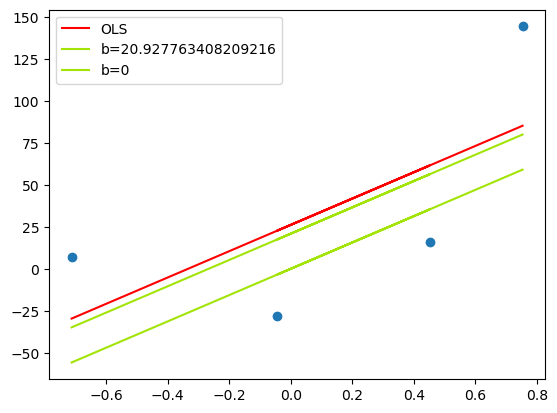

In [33]:
y_pred1=((78.35*X)+b).reshape(4)
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred,color='#A3E407',label='b={}'.format(b))
plt.plot(X,y_pred1,color='#A3E407',label='b=0')
plt.legend()
plt.show()

In [34]:
loss_slope=-2*np.sum(y-m*X.ravel()-b)
loss_slope

-41.85552681641843

In [35]:

step_size=loss_slope*lr
step_size


-4.185552681641844

In [36]:
b=b-step_size
b

25.11331608985106

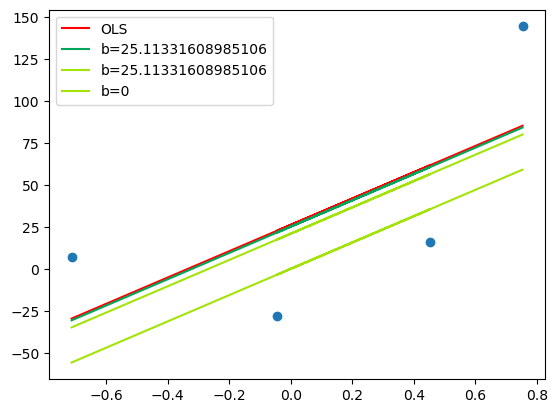

In [37]:
y_pred2=((78.35*X)+b).reshape(4)
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred2,color='#00a65a',label='b={}'.format(b))
plt.plot(X,y_pred1,color='#A3E407',label='b={}'.format(b))
plt.plot(X,y_pred,color='#A3E407',label='b=0')
plt.legend()
plt.show()

In [38]:
loss_slope=-2*np.sum(y-m*X.ravel()-b)
loss_slope

-8.371105363283675

In [39]:
step_size=loss_slope*lr
step_size

-0.8371105363283675

In [40]:
b=b-step_size
b

25.95042662617943

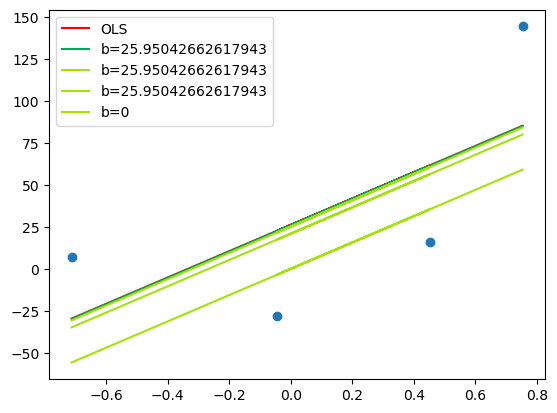

In [41]:
y_pred3=((78.35*X)+b).reshape(4)
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred3,color='#00a65a',label='b={}'.format(b))
plt.plot(X,y_pred2,color='#A3E407',label='b={}'.format(b))
plt.plot(X,y_pred1,color='#A3E407',label='b={}'.format(b))
plt.plot(X,y_pred,color='#A3E407',label='b=0')
plt.legend()
plt.show()

In [42]:
# Generate sample data
X, y = make_regression(n_samples=100,n_informative=1, n_features=1, noise=20, random_state=13)


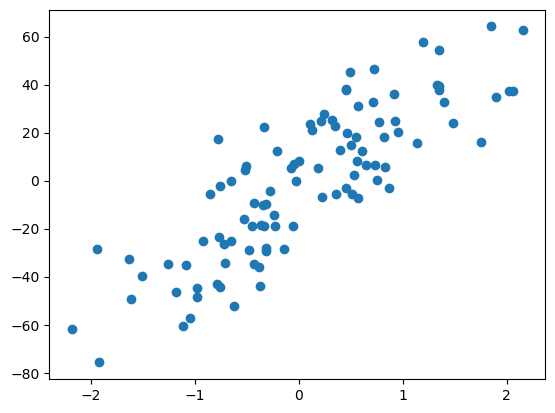

In [43]:
plt.scatter(X,y)

In [44]:
from sklearn.linear_model import LinearRegression


In [45]:
lr= LinearRegression()


In [46]:
lr.fit(X, y)

LinearRegression()

In [47]:
print(lr.coef_)
print(lr.intercept_)


[27.82809103]
-2.2947445586769795


In [48]:
# Perform cross-validation
scores = cross_val_score(estimator=lr, X=X, y=y, scoring='r2', cv=10)

# Calculate and print the mean R² score
mean_score = np.mean(scores)
print("Mean R² score:", mean_score)


Mean R² score: 0.6375011587464419


In [49]:
class GDRegressor:
    def __init__(self,learning_rate,epochs):
        self.m=100
        self.b=120
        self.lr=learning_rate
        self.epochs=epochs
    def fit(self,X,y):
        for i in range(self.epochs):
            loss_slope_b=-2*np.sum(y-self.m*X-self.b)
            loss_slope_m=-2*np.sum((y-self.m*X-self.b)*X)
            
            self.b=self.b-(self.lr*loss_slope_b)
            self.m=self.m-(self.lr*loss_slope_m)
        print(self.m,self.b)

In [50]:
gd=GDRegressor(0.001,100)
    

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [52]:
data=pd.read_csv('train.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    int64  
 1   y       700 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 11.1 KB


In [53]:
data_=pd.read_csv('test.csv')

In [54]:
data_

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


In [55]:
x_test=data_['x'].values
x_test=x_test.reshape(-1,1)
x_test

array([[ 77],
       [ 21],
       [ 22],
       [ 20],
       [ 36],
       [ 15],
       [ 62],
       [ 95],
       [ 20],
       [  5],
       [  4],
       [ 19],
       [ 96],
       [ 62],
       [ 36],
       [ 15],
       [ 65],
       [ 14],
       [ 87],
       [ 69],
       [ 89],
       [ 51],
       [ 89],
       [ 27],
       [ 97],
       [ 58],
       [ 79],
       [ 21],
       [ 93],
       [ 27],
       [ 99],
       [ 31],
       [ 33],
       [ 80],
       [ 28],
       [ 47],
       [ 53],
       [ 69],
       [ 28],
       [ 33],
       [ 91],
       [ 71],
       [ 50],
       [ 76],
       [  4],
       [ 37],
       [ 70],
       [ 68],
       [ 40],
       [ 35],
       [ 94],
       [ 88],
       [ 52],
       [ 31],
       [ 59],
       [  0],
       [ 39],
       [ 64],
       [ 69],
       [ 57],
       [ 13],
       [ 72],
       [ 76],
       [ 61],
       [ 82],
       [ 18],
       [ 41],
       [ 50],
       [ 55],
       [ 13],
       [ 46],
      

In [56]:
y_test=data_['y'].values

In [57]:
y_test=y_test

In [58]:
data

,x,y
0,24,21.549452
1,50,47.464463
2,15,17.218656
3,38,36.586398
4,87,87.288984
...,...,...
695,58,58.595006
696,93,94.625094
697,82,88.603770
698,66,63.648685


In [59]:
x_train=data['x'].values
y_train=data['y'].values

In [60]:
x_train=x_train.reshape(-1,1)

In [61]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [62]:
y_pred = lr.predict(x_test)

In [63]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 9.434852832251464
R^2 Score: 0.9887991524196075


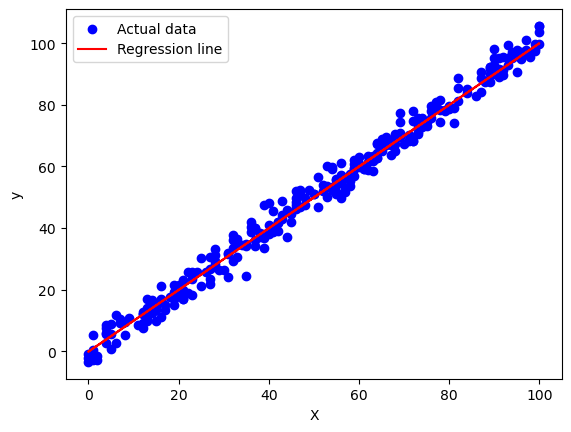

In [64]:
plt.scatter(x_test, y_test, color="blue", label="Actual data")
plt.plot(x_test, y_pred, color="red", label="Regression line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()
